### Chapter 4.2_ex - Wine Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
red_df = pd.read_csv('data/winequality-red.csv', sep = ';')
white_df = pd.read_csv('data/winequality-white.csv', sep = ';')

print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
print(white_df.shape)
white_df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
# 화이트 와인에 대한 데이터셋을 1로, 레드 와인에 대한 데이터셋을 0으로 하여 데이터프레임 병합
red_df['wine_kind'] = 0
white_df['wine_kind'] = 1

#print(red_df.columns)
result_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
              'alcohol', 'quality', 'wine_kind']

df = pd.DataFrame(columns = result_col)
df = df.append(red_df)
df = df.append(white_df)

## wine qulity, wine_kind 변수의 type 지정 
df['quality'] = df['quality'].astype('str')
df['wine_kind'] = df['wine_kind'].astype('int')

origin_df = df.copy 

print(df.shape)
df.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_kind
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


#### Step 1. Split the dataset 

In [15]:
from sklearn.model_selection import train_test_split

train_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality']

x = df[train_cols].values
y = df['wine_kind'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Step 2. Training - Logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

#### Step 3. Validation

In [17]:
# 테스트 데이터로 y값을 예측
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1] # wine_kind가 "1"인지에 대한 확률을 예측

# 실제 y값과 예측된 y값을 비교하여 모델 평가
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.98
Precision : 0.990
Recall : 0.986
F1 : 0.988


#### Step 4. Confusion matrix 

In [18]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[301  10]
 [ 14 975]]


#### Step 5. AUC and ROC

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

AUC : 0.998


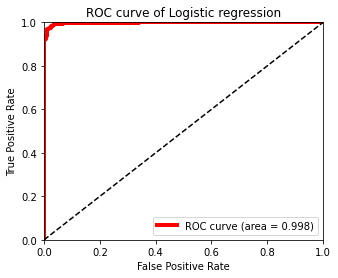

In [20]:
plt.rcParams['figure.figsize'] = [5, 4]

plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)

plt.plot([0, 1], [0, 1], 'k--') # 최하 기준선

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")